In [48]:
from astropy.io import fits as pyfits, ascii as asc
from astropy.table import Table
from create_ordered_AP_arrays import create_ordered_AP_arrays
import numpy as np, matplotlib.pyplot as plt
import plotting.general_plotting as general_plotting
import plotting_NII_Ha_ratios
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

from analysis.cardelli import *
from astropy.cosmology import FlatLambdaCDM
from scipy import stats
from scipy.interpolate import interp1d
cosmo = FlatLambdaCDM(H0 = 70 * u.km / u.s / u.Mpc, Om0=0.3)


FULL_PATH = '/Users/kaitlynshin/GoogleDrive/NASA_Summer2015/'

## plotting EBV vs M*

In [3]:
corr_tbl = asc.read(FULL_PATH+'Main_Sequence/mainseq_corrections_tbl.txt',guess=False,
                    Reader=asc.FixedWidthTwoLine)

In [4]:
corr_tbl

ID,NAME0,filt,inst_str0,zspec0,stlr_mass,flux_sigma,obs_fluxes,obs_lumin,obs_sfr,filt_corr_factor,nii_ha_corr_factor,NII_Ha_ratio,ratio_vs_line,A_V,EBV,dust_corr_factor
int64,str51,str5,str13,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,float64,float64,float64
1,Ha-NB704_001870,NB704,"MMT,",0.0724,7.73,54.4490631589,-16.0044364929,39.1026327827,-2.25501263109,0.00733734433817,-0.022503828037,0.0531829702448,line,1.67190157193,0.659523449619,0.668760628773
4,Ha-NB704_005232,NB704,"MMT,",0.0682,6.71,48.2128246934,-16.057264328,38.9953448837,-2.36230053011,0.120403121769,-0.022503828037,0.0531829702448,line,0.398766143474,0.15730329282,0.15950645739
6,Ha-NB704_005332,NB704,N/A,-10.0,6.78,3.4792732249,-17.1989383698,37.9234719142,-3.43417349957,0.110400836647,-0.022503828037,0.0531829702448,line,0.0,0.0,0.0
13,Ha-NB704_005572_OIII-IA598_028451,NB704,N/A,-10.0,5.81,12.8163151444,-16.6326637268,38.4897465572,-2.86789885662,0.110400836647,-0.022503828037,0.0531829702448,line,0.0,0.0,0.0
24,Ha-NB704_005882,NB704,N/A,-10.0,7.12,3.40347983268,-17.2085037231,37.9139065609,-3.44373885296,0.110400836647,-0.022503828037,0.0531829702448,line,0.0,0.0,0.0
26,Ha-NB704_005932,NB704,N/A,-10.0,5.98,3.07149880958,-17.2530765533,37.8693337307,-3.48831168316,0.110400836647,-0.022503828037,0.0531829702448,line,0.0,0.0,0.0
30,OIII-NB704_006046_Ha-NB921_020459,NB921,"MMT,",0.3977,7.81,3.38297261097,-17.1826019287,39.5631519254,-1.79449348842,0.0224733687212,-0.022503828037,0.0531829702448,line,0.287908583314,0.113572751668,0.115163433326
42,OIII-NB704_006189_Ha-NB921_021464,NB921,"MMT,",0.401,8.2,8.56549189741,-16.7791481018,39.9750763456,-1.38256906816,0.000147988853939,-0.0362675734975,0.087095188361,line,0.188156113632,0.0742228915943,0.075262445453
54,Ha-NB704_006587,NB704,N/A,-10.0,6.48,3.60478137959,-17.1835479736,37.9388623104,-3.41878310345,0.110400836647,-0.022503828037,0.0531829702448,line,0.0,0.0,0.0


In [5]:
data_dict = create_ordered_AP_arrays()

### done reading input files
### creating ordered AP arr
### done creating ordered AP arr
### creating ordered LMIN0/LMAX0 arrs
### done creating ordered LMIN0/LMAX0 arr
### creating ordered SNR arrs
### done creating ordered SNR arrs
### creating ordered FLUX arrs
### done creating ordered FLUX arrs


In [6]:
iis = corr_tbl['ID'].data - 1
HA_SNR = data_dict['HA_SNR'][iis]
HB_SNR = data_dict['HB_SNR'][iis]

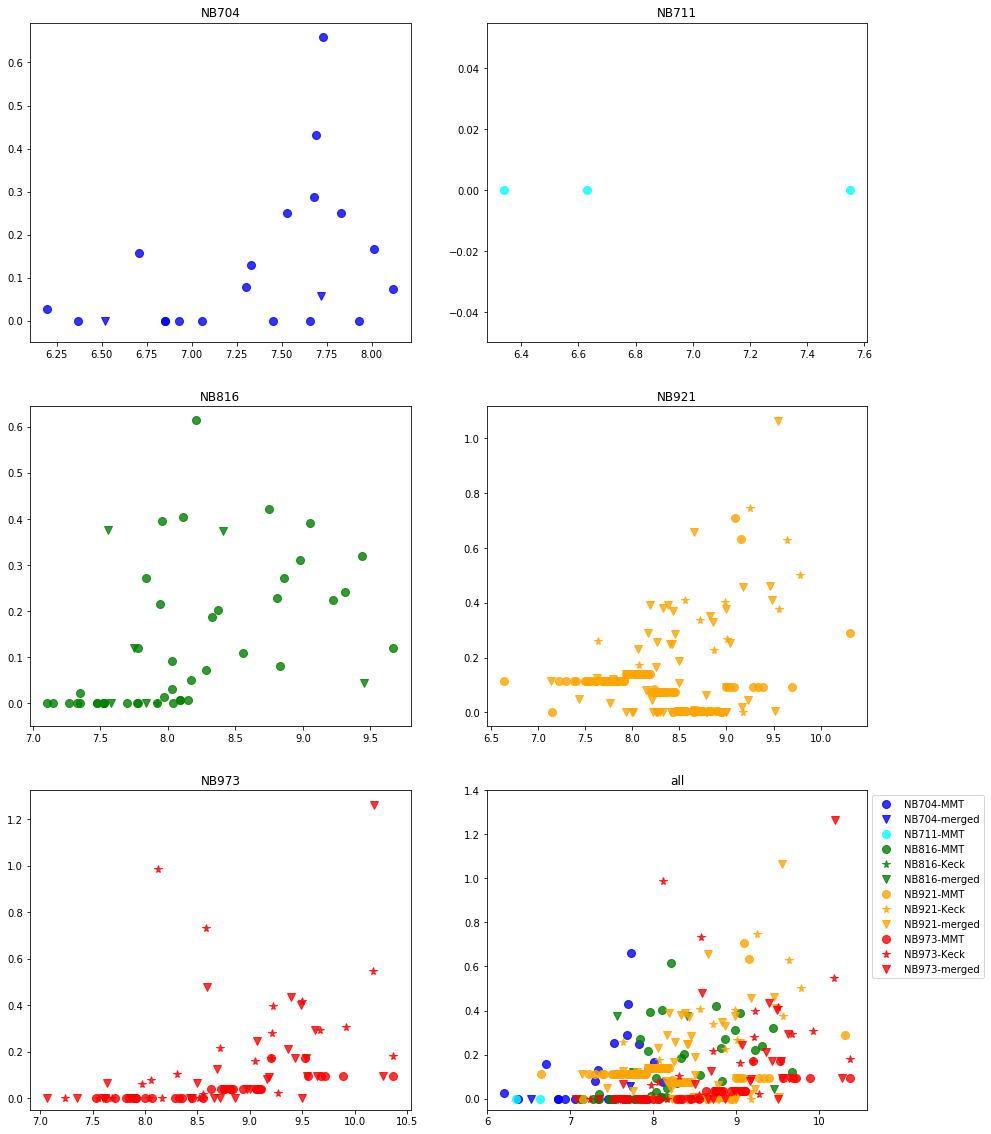

In [7]:
f, axes = plt.subplots(3,2)
axarr = np.ndarray.flatten(axes)
for ax, ff, cc in zip(axarr, ['NB704','NB711','NB816','NB921','NB973'], ['blue','cyan','green','orange','red']):
    yz_fmatch = np.where((corr_tbl['filt']==ff) & (corr_tbl['zspec0'] > 0) & (corr_tbl['zspec0'] < 9))[0]
    for inst, shape in zip(['MMT','Keck','merged'], ['o','*','s']):
        inst_match = np.array([x for x in range(len(yz_fmatch)) if inst in corr_tbl['inst_str0'][yz_fmatch][x]])

        if len(inst_match) > 0:
            mstar = corr_tbl['stlr_mass'][yz_fmatch[inst_match]]
            ebv00 = corr_tbl['EBV'][yz_fmatch[inst_match]]
            ax.plot(mstar, ebv00, color=cc, marker=shape, lw=0, markersize=8, alpha=0.8)
            
    ax.set_title(ff)
    ax.set_ylim(ymin=-0.05)

ax = axarr[5]
for ff, cc in zip(['NB704','NB711','NB816','NB921','NB973'], ['blue','cyan','green','orange','red']):
    yz_fmatch = np.where((corr_tbl['filt']==ff) & (corr_tbl['zspec0'] > 0) & (corr_tbl['zspec0'] < 9))[0]
    for inst, shape in zip(['MMT','Keck','merged'], ['o','*','s']):
        inst_match = np.array([x for x in range(len(yz_fmatch)) if inst in corr_tbl['inst_str0'][yz_fmatch][x]])

        if len(inst_match) > 0:
            mstar = corr_tbl['stlr_mass'][yz_fmatch[inst_match]]
            ebv00 = corr_tbl['EBV'][yz_fmatch[inst_match]]
            ax.plot(mstar, ebv00, color=cc, marker=shape, lw=0, markersize=8, alpha=0.8, label=ff+'-'+inst)

    ax.set_title('all')

ax.set_ylim([-0.05, 1.4])
ax.legend(loc='upper left', bbox_to_anchor=(1.0,1.0))
f.set_size_inches(15,20)

## plotting EBV vs M* with combined NB704+NB711 filters

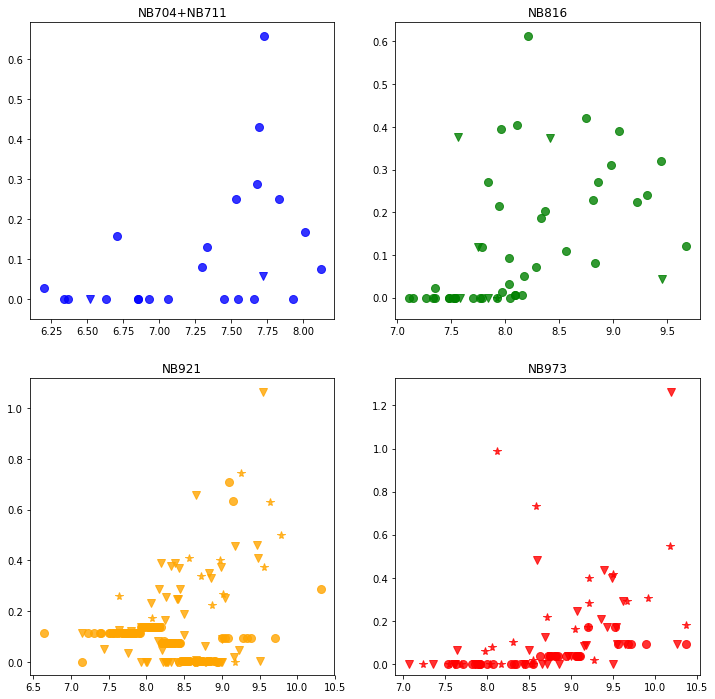

In [8]:
f, axes = plt.subplots(2,2)
axarr = np.ndarray.flatten(axes)
for ax, ff, cc in zip(axarr, ['NB704+NB711','NB816','NB921','NB973'], ['blue','green','orange','red']):
    yz_fmatch = np.array([x for x in range(len(corr_tbl)) if corr_tbl['filt'][x] in ff and corr_tbl['zspec0'][x]>0 and corr_tbl['zspec0'][x]<9])
#     yz_fmatch = np.where((corr_tbl['filt'] in ff) & (corr_tbl['zspec0'] > 0) & (corr_tbl['zspec0'] < 9))[0]
    for inst, shape in zip(['MMT','Keck','merged'], ['o','*','s']):
        inst_match = np.array([x for x in range(len(yz_fmatch)) if inst in corr_tbl['inst_str0'][yz_fmatch][x]])

        if len(inst_match) > 0:
            mstar = corr_tbl['stlr_mass'][yz_fmatch[inst_match]]
            ebv00 = corr_tbl['EBV'][yz_fmatch[inst_match]]
            ax.plot(mstar, ebv00, color=cc, marker=shape, lw=0, markersize=8, alpha=0.8)
            
    ax.set_title(ff)
    ax.set_ylim(ymin=-0.05)
f.set_size_inches(12,12)


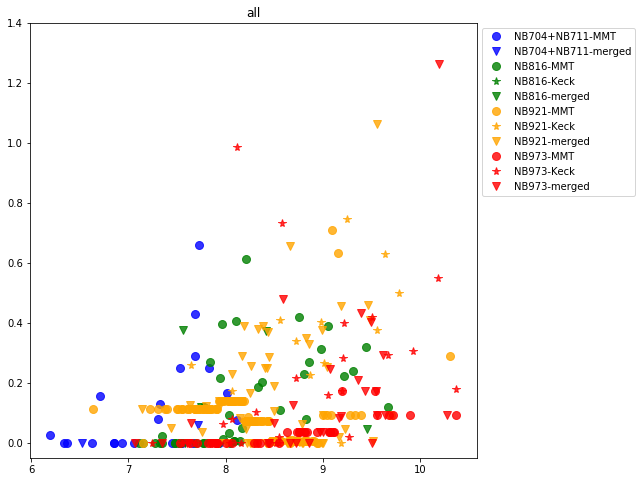

In [9]:
for ff, cc in zip(['NB704+NB711','NB816','NB921','NB973'], ['blue','green','orange','red']):
    yz_fmatch = np.array([x for x in range(len(corr_tbl)) if corr_tbl['filt'][x] in ff and corr_tbl['zspec0'][x]>0 and corr_tbl['zspec0'][x]<9])
    for inst, shape in zip(['MMT','Keck','merged'], ['o','*','s']):
        inst_match = np.array([x for x in range(len(yz_fmatch)) if inst in corr_tbl['inst_str0'][yz_fmatch][x]])

        if len(inst_match) > 0:
            mstar = corr_tbl['stlr_mass'][yz_fmatch[inst_match]]
            ebv00 = corr_tbl['EBV'][yz_fmatch[inst_match]]
            plt.plot(mstar, ebv00, color=cc, marker=shape, lw=0, markersize=8, alpha=0.8, label=ff+'-'+inst)

plt.title('all')
plt.ylim([-0.05, 1.4])
plt.legend(loc='upper left', bbox_to_anchor=(1.0,1.0))
plt.gcf().set_size_inches(8,8)

# with error bars

In [10]:
# reading in data
nbia = pyfits.open(FULL_PATH+'Catalogs/NB_IA_emitters.nodup.colorrev.fix.fits')
nbiadata = nbia[1].data
allcols = pyfits.open(FULL_PATH+'Catalogs/NB_IA_emitters.allcols.colorrev.fits')
allcolsdata0 = allcols[1].data
NAME0 = np.array(nbiadata['NAME'])
ID0   = np.array(nbiadata['ID'])
zspec = asc.read(FULL_PATH+'Catalogs/nb_ia_zspec.txt',guess=False,
                 Reader=asc.CommentedHeader)
zspec0 = np.array(zspec['zspec0'])
inst_str0 = np.array(zspec['inst_str0'])
fout  = asc.read(FULL_PATH+'FAST/outputs/NB_IA_emitters_allphot.emagcorr.ACpsf_fast.fout',
                 guess=False,Reader=asc.NoHeader)
stlr_mass = np.array(fout['col7'])
data_dict = create_ordered_AP_arrays()
AP = data_dict['AP']
HA_FLUX   = data_dict['HA_FLUX']
HB_FLUX   = data_dict['HB_FLUX']
HB_SNR    = data_dict['HB_SNR']
NIIB_FLUX = data_dict['NIIB_FLUX']
NIIB_SNR  = data_dict['NIIB_SNR']


# defining other useful data structs
filtarr = np.array(['NB704', 'NB711', 'NB816', 'NB921', 'NB973'])
inst_dict = {}
inst_dict['MMT']  = ['MMT,FOCAS,','MMT,','merged,','MMT,Keck,']
inst_dict['Keck'] = ['merged,','Keck,','Keck,Keck,','Keck,FOCAS,','Keck,FOCAS,FOCAS,','Keck,Keck,FOCAS,']


# limit all data to Halpha emitters only
ha_ii = np.array([x for x in range(len(NAME0)) if 'Ha-NB' in NAME0[x]])
NAME0       = NAME0[ha_ii]

# getting rid of special cases (no_spectra):
bad_highz_gal = np.where(NAME0=='Ha-NB816_174829_Ha-NB921_187439_Lya-IA598_163379')[0]

bad_HbNB704_SIINB973_gals = np.array([x for x in range(len(ha_ii)) if 
    (NAME0[x]=='Ha-NB704_028405_OII-NB973_056979' or 
        NAME0[x]=='Ha-NB704_090945_OII-NB973_116533')])

# getting rid of a source w/o flux (yes_spectra):
no_flux_gal = np.where(NAME0=='Ha-NB921_069950')[0]

# getting rid of a source w/ atypical SFR behavior we don't understand
weird_SFR_gal = np.where(NAME0=='OIII-NB704_063543_Ha-NB816_086540')[0]

bad_sources = np.concatenate([bad_highz_gal, bad_HbNB704_SIINB973_gals, no_flux_gal, weird_SFR_gal])
ha_ii = np.delete(ha_ii, bad_sources)
NAME0 = np.delete(NAME0, bad_sources)

ID0         = ID0[ha_ii]
zspec0      = zspec0[ha_ii]
inst_str0   = inst_str0[ha_ii]
stlr_mass   = stlr_mass[ha_ii]
AP          = AP[ha_ii]
HA_FLUX     = HA_FLUX[ha_ii]
HB_FLUX     = HB_FLUX[ha_ii]
HB_SNR      = HB_SNR[ha_ii]
NIIB_FLUX   = NIIB_FLUX[ha_ii]
NIIB_SNR    = NIIB_SNR[ha_ii]
allcolsdata = allcolsdata0[ha_ii]

no_spectra  = np.where((zspec0 <= 0) | (zspec0 > 9))[0]
yes_spectra = np.where((zspec0 >= 0) & (zspec0 < 9))[0]

k_hb = cardelli(4861 * u.Angstrom)
k_ha = cardelli(6563 * u.Angstrom)

### done reading input files
### creating ordered AP arr
### done creating ordered AP arr
### creating ordered LMIN0/LMAX0 arrs
### done creating ordered LMIN0/LMAX0 arr
### creating ordered SNR arrs
### done creating ordered SNR arrs
### creating ordered FLUX arrs
### done creating ordered FLUX arrs


In [11]:
len(HA_FLUX), len(corr_tbl)

(1080, 1080)

$$hahb = \frac{H\alpha}{H\beta}$$
$$\sigma_{Hn} = \frac{signal_{Hn}}{SNR_{Hn}}$$
$$\sigma_{hahb} = |hahb| \sqrt{(\frac{\sigma_{H\alpha}}{H\alpha})^2 + (\frac{\sigma_{H\beta}}{H\beta})^2}$$
$$EBV = \log_{10}\left( \frac{hahb/2.86}{-0.4*(k_{ha} - k_{hb})} \right)$$
$$EBV = \log_{10}(hahb) - \log_{10}(2.86 \times -0.4*(k_{ha} - k_{hb}))$$
$$\sigma_{EBV} = \frac{\sigma_{hahb}}{hahb \ln(10)}$$

In [12]:
gooddata_iis = np.where((HB_SNR[yes_spectra] >= 5) & (HA_FLUX[yes_spectra] > 1e-20) & (HA_FLUX[yes_spectra] < 99))[0]
good_EBV_iis = yes_spectra[gooddata_iis]

hahb = HA_FLUX[good_EBV_iis]/HB_FLUX[good_EBV_iis]
sigma_hahb = hahb * np.sqrt((1/HA_SNR[good_EBV_iis])**2 + (1/HB_SNR[good_EBV_iis])**2)
sigma_ebv = sigma_hahb/(hahb * np.log(10))

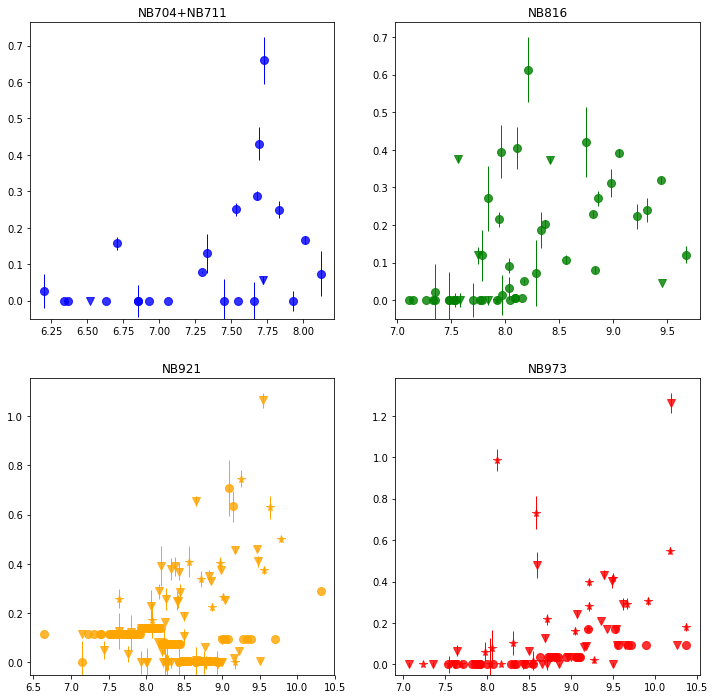

In [13]:
f, axes = plt.subplots(2,2)
axarr = np.ndarray.flatten(axes)
for ax, ff, cc in zip(axarr, ['NB704+NB711','NB816','NB921','NB973'], ['blue','green','orange','red']):
    yz_fmatch = np.array([x for x in range(len(corr_tbl)) if corr_tbl['filt'][x] in ff and corr_tbl['zspec0'][x]>0 and corr_tbl['zspec0'][x]<9])
    for inst, shape in zip(['MMT','Keck','merged'], ['o','*','s']):
        inst_match = np.array([x for x in range(len(yz_fmatch)) if inst in corr_tbl['inst_str0'][yz_fmatch][x]])

        if len(inst_match) > 0:
            mstar = corr_tbl['stlr_mass'][yz_fmatch[inst_match]]
            ebv00 = corr_tbl['EBV'][yz_fmatch[inst_match]]            
            ax.plot(mstar, ebv00, color=cc, marker=shape, lw=0, markersize=8, alpha=0.8)

            has_errs = np.array([x for x in yz_fmatch[inst_match] if x in good_EBV_iis])
            if len(has_errs) > 0:
                sig_iis = np.array([x for x in range(len(good_EBV_iis)) if good_EBV_iis[x] in has_errs])
                ax.errorbar(corr_tbl['stlr_mass'][has_errs], corr_tbl['EBV'][has_errs], yerr=sigma_ebv[sig_iis],
                            fmt='none', mew=0, ecolor=cc)

    ax.set_title(ff)
    ax.set_ylim(ymin=-0.05)
f.set_size_inches(12,12)

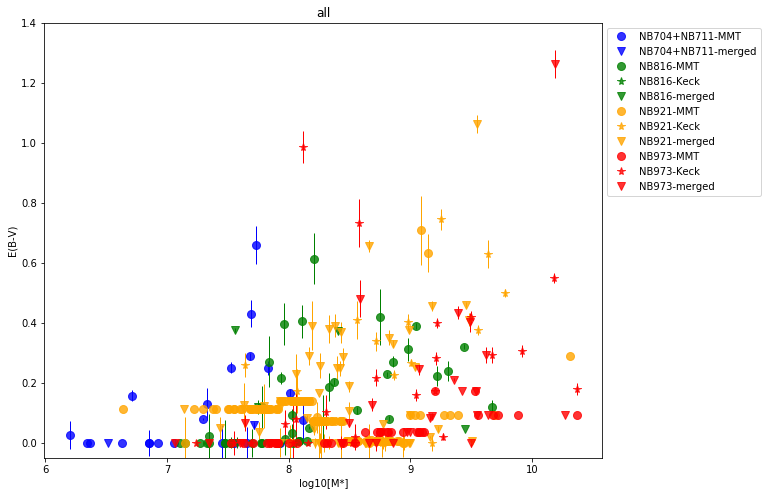

In [14]:
f, ax = plt.subplots(1,1)

for ff, cc in zip(['NB704+NB711','NB816','NB921','NB973'], ['blue','green','orange','red']):
    yz_fmatch = np.array([x for x in range(len(corr_tbl)) if corr_tbl['filt'][x] in ff and 
                          corr_tbl['zspec0'][x]>0 and corr_tbl['zspec0'][x]<9])
    for inst, shape in zip(['MMT','Keck','merged'], ['o','*','s']):
        inst_match = np.array([x for x in range(len(yz_fmatch)) if inst in corr_tbl['inst_str0'][yz_fmatch][x]])

        if len(inst_match) > 0:
            mstar = corr_tbl['stlr_mass'][yz_fmatch[inst_match]]
            ebv00 = corr_tbl['EBV'][yz_fmatch[inst_match]]
            plt.plot(mstar, ebv00, color=cc, marker=shape, lw=0, markersize=8, alpha=0.8, label=ff+'-'+inst)
            
            has_errs = np.array([x for x in yz_fmatch[inst_match] if x in good_EBV_iis])
            if len(has_errs) > 0:
                sig_iis = np.array([x for x in range(len(good_EBV_iis)) if good_EBV_iis[x] in has_errs])
                plt.errorbar(corr_tbl['stlr_mass'][has_errs], corr_tbl['EBV'][has_errs], yerr=sigma_ebv[sig_iis],
                            fmt='none', mew=0, ecolor=cc)

plt.title('all')
plt.ylim([-0.05, 1.4])
plt.xlabel('log10[M*]')
plt.ylabel('E(B-V)')
plt.gcf().set_size_inches(10,8)

# remove error bars from legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:11], labels[:11], loc='upper left',numpoints=1, bbox_to_anchor=(1.0,1.0))

plt.show()

# with A(Ha) labels on the right vertical axis

In [15]:
# A_Ha = k_ha * EBV_corrs
k_ha = cardelli(6563.0 * u.Angstrom)

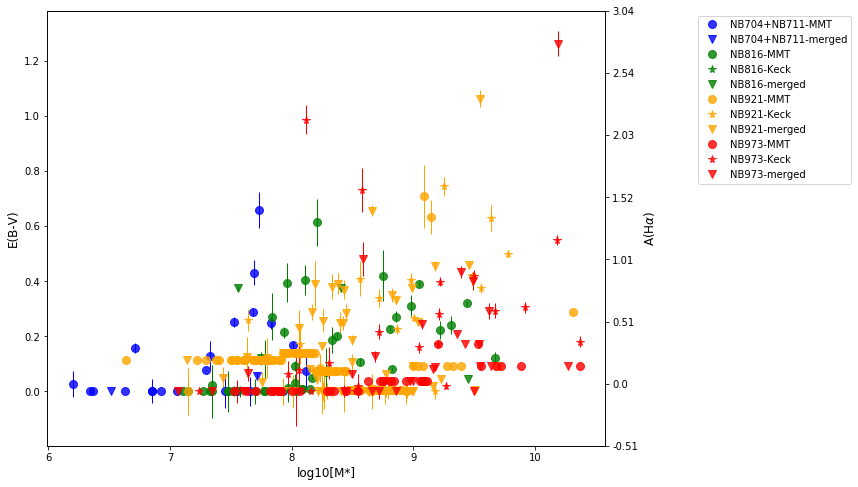

In [16]:
f, ax = plt.subplots(1,1)

for ff, cc in zip(['NB704+NB711','NB816','NB921','NB973'], ['blue','green','orange','red']):
    yz_fmatch = np.array([x for x in range(len(corr_tbl)) if corr_tbl['filt'][x] in ff and 
                          corr_tbl['zspec0'][x]>0 and corr_tbl['zspec0'][x]<9])
    for inst, shape in zip(['MMT','Keck','merged'], ['o','*','s']):
        inst_match = np.array([x for x in range(len(yz_fmatch)) if inst in corr_tbl['inst_str0'][yz_fmatch][x]])

        if len(inst_match) > 0:
            mstar = corr_tbl['stlr_mass'][yz_fmatch[inst_match]]
            ebv00 = corr_tbl['EBV'][yz_fmatch[inst_match]]
            plt.plot(mstar, ebv00, color=cc, marker=shape, lw=0, markersize=8, alpha=0.8, label=ff+'-'+inst)
            
            has_errs = np.array([x for x in yz_fmatch[inst_match] if x in good_EBV_iis])
            if len(has_errs) > 0:
                sig_iis = np.array([x for x in range(len(good_EBV_iis)) if good_EBV_iis[x] in has_errs])
                plt.errorbar(corr_tbl['stlr_mass'][has_errs], corr_tbl['EBV'][has_errs], yerr=sigma_ebv[sig_iis],
                            fmt='none', mew=0, ecolor=cc)

plt.xlabel('log10[M*]', size=12)
plt.ylabel('E(B-V)', size=12)
plt.gcf().set_size_inches(10,8)

# remove error bars from legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:11], labels[:11], bbox_to_anchor=(1.45,1.0))

# set right y axis props
ax2 = ax.twinx()
ax2.set_ylabel(r'A(H$\alpha$)', size=12)
texts = np.array([str(np.around(k_ha*x,2)) for x in ax.get_yticks()[:-1]])
ax2.set_yticklabels(texts)
ax2.set_yticks(ax.get_yticks()[:-1])

plt.show()

# Using Garn & Best (2010) https://arxiv.org/pdf/1007.1145.pdf

From eqn (5):
$$A_{H\alpha} = \sum_{i=0}^{n} B_i X^i$$

For stellar mass:
$$X = \log_{10}(\frac{M*}{10^{10} M_\odot})$$

From table 4 for stellar mass:
$$A_{H\alpha} = 0.91 + 0.77X + 0.11X^2 - 0.09X^3$$

Since our stellar masses are in log10(M*/M$_\odot$), we simply subtract 10 from X so that it is equal to M.

Note: this is only valid for m = 10\**8.5 to 10**11.5.

In [17]:
x_arr = np.arange(8.5, 10.6, 0.1)
gb2010 = 0.91 + 0.77*(x_arr-10) + 0.11*(x_arr-10)**2 - 0.09*(x_arr-10)**3
gb2010

array([ 0.30625,  0.29456,  0.29263,  0.29992,  0.31589,  0.34   ,
        0.37171,  0.41048,  0.45577,  0.50704,  0.56375,  0.62536,
        0.69133,  0.76112,  0.83419,  0.91   ,  0.98801,  1.06768,
        1.14847,  1.22984,  1.31125])

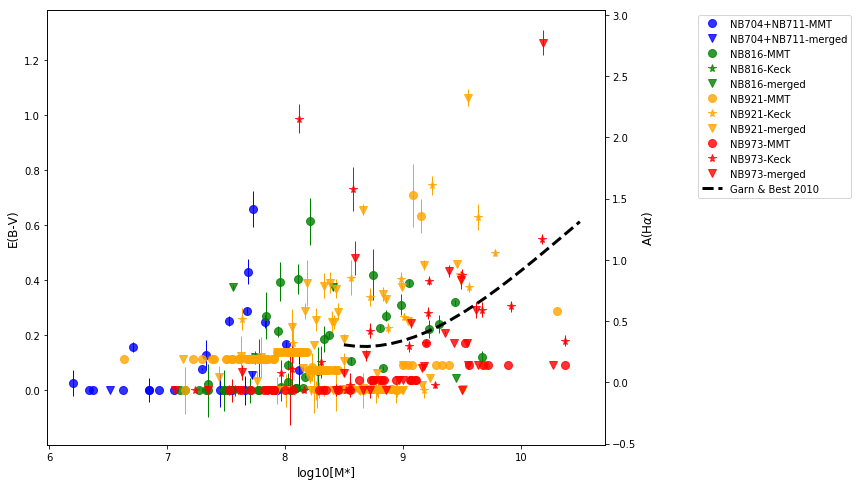

In [18]:
f, ax = plt.subplots(1,1)

for ff, cc in zip(['NB704+NB711','NB816','NB921','NB973'], ['blue','green','orange','red']):
    yz_fmatch = np.array([x for x in range(len(corr_tbl)) if corr_tbl['filt'][x] in ff and 
                          corr_tbl['zspec0'][x]>0 and corr_tbl['zspec0'][x]<9])
    for inst, shape in zip(['MMT','Keck','merged'], ['o','*','s']):
        inst_match = np.array([x for x in range(len(yz_fmatch)) if inst in corr_tbl['inst_str0'][yz_fmatch][x]])

        if len(inst_match) > 0:
            mstar = corr_tbl['stlr_mass'][yz_fmatch[inst_match]]
            ebv00 = corr_tbl['EBV'][yz_fmatch[inst_match]]
            plt.plot(mstar, ebv00, color=cc, marker=shape, lw=0, markersize=8, alpha=0.8, label=ff+'-'+inst)
            
            has_errs = np.array([x for x in yz_fmatch[inst_match] if x in good_EBV_iis])
            if len(has_errs) > 0:
                sig_iis = np.array([x for x in range(len(good_EBV_iis)) if good_EBV_iis[x] in has_errs])
                plt.errorbar(corr_tbl['stlr_mass'][has_errs], corr_tbl['EBV'][has_errs], yerr=sigma_ebv[sig_iis],
                            fmt='none', mew=0, ecolor=cc)

plt.xlabel('log10[M*]', size=12)
plt.ylabel('E(B-V)', size=12)
plt.gcf().set_size_inches(10,8)

# set right y axis props
ax2 = ax.twinx()
ax2.set_ylabel(r'A(H$\alpha$)', size=12)
ntexts = np.array([np.around(k_ha*x,2) for x in ax.get_yticks()[:-1]])
line2, = ax2.plot(x_arr, gb2010, 'k--', lw=3, label='Garn & Best 2010')
ax2.set_ylim(min(ntexts), max(ntexts))

# remove error bars from legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(np.hstack([handles[:11], line2]), np.hstack([labels[:11], 'Garn & Best 2010']), 
          bbox_to_anchor=(1.45,1.0))
plt.show()

# including composite data

In [19]:
mmt_mz  = asc.read(FULL_PATH+'Composite_Spectra/StellarMassZ/MMT_stlrmassZ_data.txt',
    guess=False, format='fixed_width_two_line', delimiter=' ')
keck_mz = asc.read(FULL_PATH+'Composite_Spectra/StellarMassZ/Keck_stlrmassZ_data.txt',
    guess=False, format='fixed_width_two_line', delimiter=' ')

# using only valid mmt_mz m bins
aa = np.array([x for x in range(len(mmt_mz)) if mmt_mz['stlrmass_bin'][x] != 'N/A'])

# getting more info from the data
m = len(mmt_mz[aa])
k = len(keck_mz)
filt_arr = np.concatenate((mmt_mz['filter'][aa], keck_mz['filter']))
inst_arr = np.concatenate((['MMT']*m, ['Keck']*k))
avgm_arr = np.concatenate((mmt_mz['avg_stlrmass'][aa], keck_mz['avg_stlrmass']))
minm_arr = np.concatenate((mmt_mz['min_stlrmass'][aa], keck_mz['min_stlrmass']))
maxm_arr = np.concatenate((mmt_mz['max_stlrmass'][aa], keck_mz['max_stlrmass']))
EBV = np.concatenate((mmt_mz['E(B-V)_hahb'][aa], keck_mz['E(B-V)_hahb']))
EBV_rms = np.concatenate((mmt_mz['E(B-V)_hahb_rms'][aa], keck_mz['E(B-V)_hahb_rms']))

# replacing invalid MMT NB973 EBV_hahb w/ EBV_hghb
h = [x for x in range(len(aa)) if mmt_mz['filter'][aa][x]=='NB973'][0]
EBV[h:h+5] = mmt_mz['E(B-V)_hghb'][-5:]
EBV_rms[h:h+5] = mmt_mz['E(B-V)_hghb_rms'][-5:]

# replacing invalid lowest two m bins MMT NB921 EBV_hahb w/ EBV_hghb
i = np.where(mmt_mz['filter']=='NB921')[0][0]
j = [x for x in range(len(aa)) if mmt_mz['filter'][aa][x]=='NB921'][0]
EBV[j:j+2] = mmt_mz['E(B-V)_hghb'][i:i+2]
EBV_rms[j:j+2] = mmt_mz['E(B-V)_hghb_rms'][i:i+2]

In [20]:
EBV_rms

array([ 0.10341136,  0.08995631,  0.1236975 ,  0.12766142,  0.13429053,
        0.09153374,  0.97602642,  0.58437428,  0.23686966,  0.19645296,
        0.10222872,  0.83365172,  0.48325277,  0.45849805,  0.34599432,
        0.38967466,  1.0216156 ,  0.55752054,  0.46460817,  0.23179182,
        0.17240716,  0.31846921,  0.25977919,  0.21271903,  0.21839086,
        0.17595282])

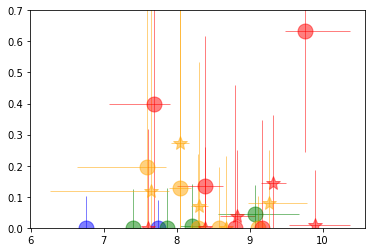

In [21]:
for ff, cc in zip(['NB704+NB711','NB816','NB921','NB973'], ['blue','green','orange','red']):
    yz_fmatch = np.array([x for x in range(len(filt_arr)) if filt_arr[x] in ff])
    
    for inst, shape in zip(['MMT','Keck'], ['o','*']):
        inst_match = np.array([x for x in range(len(yz_fmatch)) if inst_arr[yz_fmatch][x]==inst])
        
        if len(inst_match) > 0:
            mstar = avgm_arr[yz_fmatch[inst_match]]
            ebv00 = EBV[yz_fmatch[inst_match]]
            
            plt.plot(mstar, ebv00, color=cc, marker=shape, lw=0, markersize=15, alpha=0.5, label=ff+'-'+inst)
            plt.errorbar(mstar, ebv00, 
                         xerr=np.array([mstar-minm_arr[yz_fmatch[inst_match]], 
                                        maxm_arr[yz_fmatch[inst_match]]-mstar]),
                         yerr=EBV_rms[yz_fmatch[inst_match]],
                         fmt='none', ecolor=cc, alpha=0.5)
plt.ylim([0,0.7])
plt.show()

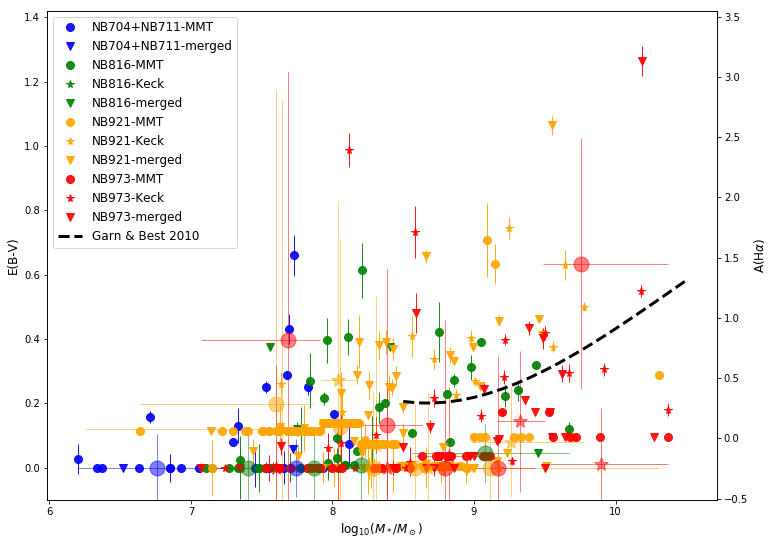

In [22]:
f, ax = plt.subplots(1,1)

for ff, cc in zip(['NB704+NB711','NB816','NB921','NB973'], ['blue','green','orange','red']):
    yz_fmatch = np.array([x for x in range(len(corr_tbl)) if corr_tbl['filt'][x] in ff and 
                          corr_tbl['zspec0'][x]>0 and corr_tbl['zspec0'][x]<9])
    for inst, shape in zip(['MMT','Keck','merged'], ['o','*','s']):
        inst_match = np.array([x for x in range(len(yz_fmatch)) if inst in corr_tbl['inst_str0'][yz_fmatch][x]])

        if len(inst_match) > 0:
            mstar = corr_tbl['stlr_mass'][yz_fmatch[inst_match]]
            ebv00 = corr_tbl['EBV'][yz_fmatch[inst_match]]
            plt.plot(mstar, ebv00, color=cc, marker=shape, lw=0, markersize=8, alpha=0.9, label=ff+'-'+inst)
            
            has_errs = np.array([x for x in yz_fmatch[inst_match] if x in good_EBV_iis])
            if len(has_errs) > 0:
                sig_iis = np.array([x for x in range(len(good_EBV_iis)) if good_EBV_iis[x] in has_errs])
                plt.errorbar(corr_tbl['stlr_mass'][has_errs], corr_tbl['EBV'][has_errs], yerr=sigma_ebv[sig_iis],
                            fmt='none', mew=0, ecolor=cc, alpha=0.9)

plt.xlabel(r'$\log_{10}(M_*/M_\odot)$', size=12)
plt.ylabel('E(B-V)', size=12)
plt.gcf().set_size_inches(12,9)

# plotting composites
for ff, cc in zip(['NB704+NB711','NB816','NB921','NB973'], ['blue','green','orange','red']):
    yz_fmatch = np.array([x for x in range(len(filt_arr)) if filt_arr[x] in ff])
    
    for inst, shape in zip(['MMT','Keck'], ['o','*']):
        inst_match = np.array([x for x in range(len(yz_fmatch)) if inst_arr[yz_fmatch][x]==inst])
        
        if len(inst_match) > 0:
            mstar = avgm_arr[yz_fmatch[inst_match]]
            ebv00 = EBV[yz_fmatch[inst_match]]
            
            plt.plot(mstar, ebv00, color=cc, marker=shape, lw=0, markersize=15, alpha=0.5, label=ff+'-'+inst)
            plt.errorbar(mstar, ebv00, 
                         xerr=np.array([mstar-minm_arr[yz_fmatch[inst_match]], 
                                        maxm_arr[yz_fmatch[inst_match]]-mstar]),
                         yerr=EBV_rms[yz_fmatch[inst_match]],
                         fmt='none', ecolor=cc, alpha=0.5)

plt.ylim(ymin=-0.1)

# set right y axis props
ax2 = ax.twinx()
ax2.set_ylabel(r'A(H$\alpha$)', size=12)
ntexts = np.array([np.around(k_ha*x,2) for x in ax.get_yticks()[:-1]])
line2, = ax2.plot(x_arr, gb2010, 'k--', lw=3, label='Garn & Best 2010')
ax2.set_ylim(min(ntexts), max(ntexts))

# remove error bars from legend
handles, labels = ax.get_legend_handles_labels()
LEGEND = ax.legend(np.hstack([handles[:11], line2]), np.hstack([labels[:11], 'Garn & Best 2010']), fontsize=12, 
                   loc='best')

plt.show()

# splitting into two plots (MMT+merged; Keck+merged)

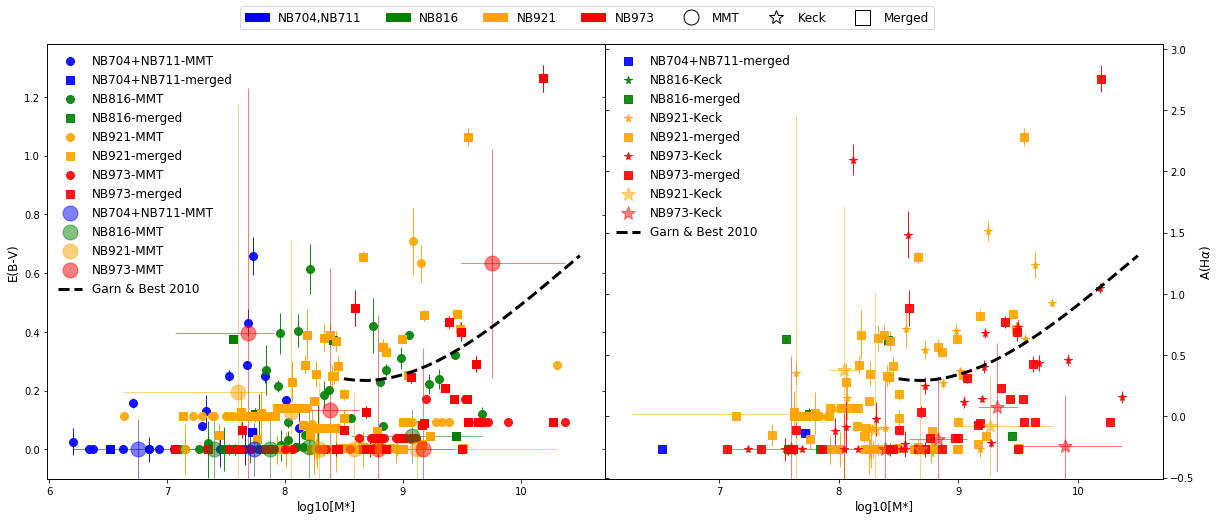

In [60]:
f, axarr = plt.subplots(1,2)

for ff, cc in zip(['NB704+NB711','NB816','NB921','NB973'], ['blue','green','orange','red']):
    yz_fmatch = np.array([x for x in range(len(corr_tbl)) if corr_tbl['filt'][x] in ff and 
                          corr_tbl['zspec0'][x]>0 and corr_tbl['zspec0'][x]<9])
    for inst, shape, ax_ii in zip(['MMT','Keck','merged'], ['o','*','s'], [0, 1, 0]):
        inst_match = np.array([x for x in range(len(yz_fmatch)) if inst in corr_tbl['inst_str0'][yz_fmatch][x]])

        if len(inst_match) > 0:
            mstar = corr_tbl['stlr_mass'][yz_fmatch[inst_match]]
            ebv00 = corr_tbl['EBV'][yz_fmatch[inst_match]]
            
            axarr[ax_ii].plot(mstar, ebv00, color=cc, marker=shape, lw=0, markersize=8, alpha=0.9, label=ff+'-'+inst)

            has_errs = np.array([x for x in yz_fmatch[inst_match] if x in good_EBV_iis])
            if len(has_errs) > 0:
                sig_iis = np.array([x for x in range(len(good_EBV_iis)) if good_EBV_iis[x] in has_errs])
                axarr[ax_ii].errorbar(corr_tbl['stlr_mass'][has_errs], corr_tbl['EBV'][has_errs], yerr=sigma_ebv[sig_iis],
                            fmt='none', mew=0, ecolor=cc, alpha=0.9)
            
            if inst=='merged':
                for ax_ii in range(2):
                    axarr[ax_ii].plot(mstar, ebv00, color=cc, marker=shape, lw=0, markersize=8, alpha=0.9, label=ff+'-'+inst)

                    has_errs = np.array([x for x in yz_fmatch[inst_match] if x in good_EBV_iis])
                    if len(has_errs) > 0:
                        sig_iis = np.array([x for x in range(len(good_EBV_iis)) if good_EBV_iis[x] in has_errs])
                        axarr[ax_ii].errorbar(corr_tbl['stlr_mass'][has_errs], corr_tbl['EBV'][has_errs], yerr=sigma_ebv[sig_iis],
                                    fmt='none', mew=0, ecolor=cc, alpha=0.9)

# plotting composites
for ff, cc in zip(['NB704+NB711','NB816','NB921','NB973'], ['blue','green','orange','red']):
    yz_fmatch = np.array([x for x in range(len(filt_arr)) if filt_arr[x] in ff])
    
    for inst, shape, ax_ii in zip(['MMT','Keck'], ['o','*'], [0,1]):
        inst_match = np.array([x for x in range(len(yz_fmatch)) if inst_arr[yz_fmatch][x]==inst])
        
        if len(inst_match) > 0:
            mstar = avgm_arr[yz_fmatch[inst_match]]
            ebv00 = EBV[yz_fmatch[inst_match]]
            
            axarr[ax_ii].plot(mstar, ebv00, color=cc, marker=shape, lw=0, markersize=15, alpha=0.5, label=ff+'-'+inst)
            axarr[ax_ii].errorbar(mstar, ebv00, 
                         xerr=np.array([mstar-minm_arr[yz_fmatch[inst_match]], 
                                        maxm_arr[yz_fmatch[inst_match]]-mstar]),
                         yerr=EBV_rms[yz_fmatch[inst_match]],
                         fmt='none', ecolor=cc, alpha=0.5)
        axarr[ax_ii].set_ylim(ymin=-0.1)

f.set_size_inches(20,8)
f.subplots_adjust(wspace=0)

# set axis props
for ax, ii in zip(axarr, range(2)):
    ax.set_xlabel('log10[M*]', size=12)

    ax2 = ax.twinx()
    if ii==1:
        ax.set_yticklabels([])
        ax2.set_ylabel(r'A(H$\alpha$)', size=12)
    else:
        ax2.set_yticklabels([])
        ax.set_ylabel('E(B-V)', size=12)
    ntexts = np.array([np.around(k_ha*x,2) for x in ax.get_yticks()[:-1]])
    line2, = ax2.plot(x_arr, gb2010, 'k--', lw=3, label='Garn & Best 2010')
    ax2.set_ylim(min(ntexts), max(ntexts))

# remove error bars from legend
handles0, labels0 = axarr[0].get_legend_handles_labels()
LEGEND1 = axarr[0].legend(np.delete(np.hstack([handles0[:16], line2]), [1,4,7,10]), 
                          np.delete(np.hstack([labels0[:16], 'Garn & Best 2010']), [1,4,7,10]), 
                          fontsize=12, loc='best', frameon=False)
handles, labels = ax.get_legend_handles_labels()
LEGEND2 = axarr[1].legend(np.hstack([handles[:9], line2]), np.hstack([labels[:9], 'Garn & Best 2010']), fontsize=12, 
                   loc='best', frameon=False)


b_patch = mpatches.Patch(color='b', label='NB704,NB711')
g_patch = mpatches.Patch(color='g', label='NB816')
o_patch = mpatches.Patch(color='orange', label='NB921')
r_patch = mpatches.Patch(color='r', label='NB973')

mmt = mlines.Line2D([], [], color='white', mec='k', marker='o', markersize=15, label='MMT')
keck = mlines.Line2D([], [], color='white', mec='k', marker='*', markersize=15, label='Keck')
mrgd = mlines.Line2D([], [], color='white', mec='k', marker='s', markersize=15, label='Merged')
# plt.legend(handles=[blue_line], bbox_to_anchor=(-0.1, 1.1), ncol=4, fontsize=12)

plt.legend(handles=[b_patch, g_patch, o_patch, r_patch, mmt, keck, mrgd], bbox_to_anchor=(0.6, 1.1), ncol=7, fontsize=12)


plt.show()

### fiddling with legends

In [ ]:
f, axarr = plt.subplots(1,2)

for ff, cc in zip(['NB704+NB711','NB816','NB921','NB973'], ['blue','green','orange','red']):
    yz_fmatch = np.array([x for x in range(len(corr_tbl)) if corr_tbl['filt'][x] in ff and 
                          corr_tbl['zspec0'][x]>0 and corr_tbl['zspec0'][x]<9])
    for inst, shape, ax_ii in zip(['MMT','Keck','merged'], ['o','*','s'], [0, 1, 0]):
        inst_match = np.array([x for x in range(len(yz_fmatch)) if inst in corr_tbl['inst_str0'][yz_fmatch][x]])

        if len(inst_match) > 0:
            mstar = corr_tbl['stlr_mass'][yz_fmatch[inst_match]]
            ebv00 = corr_tbl['EBV'][yz_fmatch[inst_match]]
            
            axarr[ax_ii].plot(mstar, ebv00, color=cc, marker=shape, lw=0, markersize=8, alpha=0.9, label=ff+'-'+inst)

            has_errs = np.array([x for x in yz_fmatch[inst_match] if x in good_EBV_iis])
            if len(has_errs) > 0:
                sig_iis = np.array([x for x in range(len(good_EBV_iis)) if good_EBV_iis[x] in has_errs])
                axarr[ax_ii].errorbar(corr_tbl['stlr_mass'][has_errs], corr_tbl['EBV'][has_errs], yerr=sigma_ebv[sig_iis],
                            fmt='none', mew=0, ecolor=cc, alpha=0.9)
            
            if inst=='merged':
                for ax_ii in range(2):
                    axarr[ax_ii].plot(mstar, ebv00, color=cc, marker=shape, lw=0, markersize=8, alpha=0.9, label=ff+'-'+inst)

                    has_errs = np.array([x for x in yz_fmatch[inst_match] if x in good_EBV_iis])
                    if len(has_errs) > 0:
                        sig_iis = np.array([x for x in range(len(good_EBV_iis)) if good_EBV_iis[x] in has_errs])
                        axarr[ax_ii].errorbar(corr_tbl['stlr_mass'][has_errs], corr_tbl['EBV'][has_errs], yerr=sigma_ebv[sig_iis],
                                    fmt='none', mew=0, ecolor=cc, alpha=0.9)

# plotting composites
for ff, cc in zip(['NB704+NB711','NB816','NB921','NB973'], ['blue','green','orange','red']):
    yz_fmatch = np.array([x for x in range(len(filt_arr)) if filt_arr[x] in ff])
    
    for inst, shape, ax_ii in zip(['MMT','Keck'], ['o','*'], [0,1]):
        inst_match = np.array([x for x in range(len(yz_fmatch)) if inst_arr[yz_fmatch][x]==inst])
        
        if len(inst_match) > 0:
            mstar = avgm_arr[yz_fmatch[inst_match]]
            ebv00 = EBV[yz_fmatch[inst_match]]
            
            axarr[ax_ii].plot(mstar, ebv00, color=cc, marker=shape, lw=0, markersize=15, alpha=0.5, label=ff+'-'+inst)
            axarr[ax_ii].errorbar(mstar, ebv00, 
                         xerr=np.array([mstar-minm_arr[yz_fmatch[inst_match]], 
                                        maxm_arr[yz_fmatch[inst_match]]-mstar]),
                         yerr=EBV_rms[yz_fmatch[inst_match]],
                         fmt='none', ecolor=cc, alpha=0.5)
        axarr[ax_ii].set_ylim(ymin=-0.1)

f.set_size_inches(20,8)
f.subplots_adjust(wspace=0)

# set axis props
for ax, ii in zip(axarr, range(2)):
    ax.set_xlabel('log10[M*]', size=12)

    ax2 = ax.twinx()
    if ii==1:
        ax.set_yticklabels([])
        ax2.set_ylabel(r'A(H$\alpha$)', size=12)
    else:
        ax2.set_yticklabels([])
        ax.set_ylabel('E(B-V)', size=12)
    ntexts = np.array([np.around(k_ha*x,2) for x in ax.get_yticks()[:-1]])
    line2, = ax2.plot(x_arr, gb2010, 'k--', lw=3, label='Garn & Best 2010')
    ax2.set_ylim(min(ntexts), max(ntexts))

# remove error bars from legend
handles0, labels0 = axarr[0].get_legend_handles_labels()
LEGEND1 = axarr[0].legend(np.delete(np.hstack([handles0[:16], line2]), [1,4,7,10]), 
                          np.delete(np.hstack([labels0[:16], 'Garn & Best 2010']), [1,4,7,10]), 
                          fontsize=12, loc='best', frameon=False)
handles, labels = ax.get_legend_handles_labels()
LEGEND2 = axarr[1].legend(np.hstack([handles[:9], line2]), np.hstack([labels[:9], 'Garn & Best 2010']), fontsize=12, 
                   loc='best', frameon=False)


b_patch = mpatches.Patch(color='b', label='NB704,NB711')
g_patch = mpatches.Patch(color='g', label='NB816')
o_patch = mpatches.Patch(color='orange', label='NB921')
r_patch = mpatches.Patch(color='r', label='NB973')

mmt = mlines.Line2D([], [], color='white', mec='k', marker='o', markersize=15, label='MMT')
keck = mlines.Line2D([], [], color='white', mec='k', marker='*', markersize=15, label='Keck')
mrgd = mlines.Line2D([], [], color='white', mec='k', marker='s', markersize=15, label='Merged')
# plt.legend(handles=[blue_line], bbox_to_anchor=(-0.1, 1.1), ncol=4, fontsize=12)

plt.legend(handles=[b_patch, g_patch, o_patch, r_patch, mmt, keck, mrgd], bbox_to_anchor=(0.6, 1.1), ncol=7, fontsize=12)


plt.show()